In [101]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### The Quantum Object 


### Bra-Ket Notation

In [102]:
Qobj()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

The base quantum object is a **bra** vector denoted by $\langle \psi|$

This is the equivalent of a 1x1 matrix with zero as the only entry.

Creating a bra vector with data using list comp:

In [103]:
Qobj([[x for x in range(5)]])

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[0. 1. 2. 3. 4.]]

In [104]:
Qobj([[x] for x in range(5)])

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]

A **ket** vector, represented by $|\psi\rangle$ is the equivalent of a column vector. In this notation, we have created a 1x5 column vector.

- qtip rundown

- Bra / Ket notation

- Commutators

- Spin

- tunneling

- Hilbert Space

- Back prop parameters


A random vector, really an **operator**

In [105]:
r = np.random.rand(4,4)
r

array([[0.41079389, 0.57163363, 0.20873792, 0.98767975],
       [0.26628069, 0.86483928, 0.88485525, 0.76909219],
       [0.22591401, 0.78331062, 0.0265654 , 0.87550514],
       [0.33201357, 0.55049011, 0.79110036, 0.08709268]])

In [106]:
Qobj(r)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.41079389 0.57163363 0.20873792 0.98767975]
 [0.26628069 0.86483928 0.88485525 0.76909219]
 [0.22591401 0.78331062 0.0265654  0.87550514]
 [0.33201357 0.55049011 0.79110036 0.08709268]]

### Creating a Hilbert Space

### fock state operator

- The equivalent of a particle selector operator $\hat{N}_{k}$ where $\sum_{i}\hat{N}_{k_{i}}$ = $\hat{N}$ (the total number of particles in a system).

In [107]:
basis(10, 3)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In multi-dimensional space:

In [108]:
fock_dm(10, 3)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

### Operator Example

***Destruction Operator***

The lowering operator, removes elements of a matrix below a particular ground state. It is particularly useful for the case of the Quantum Harmonic Oscillator.

In [109]:
d = destroy(4)

In [110]:
d.data

<4x4 sparse matrix of type '<class 'numpy.complex128'>'
	with 3 stored elements in Compressed Sparse Row format>

***Sparse matrices are the default storage type***

In [111]:
d

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]

### Matrix Mathematics 

- Adding constants

In [112]:
d + 5

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[5.         1.         0.         0.        ]
 [0.         5.         1.41421356 0.        ]
 [0.         0.         5.         1.73205081]
 [0.         0.         0.         5.        ]]

adding or subtracting a constant *a* is the equivalent of adding/subtracting $a\hat{I}$ where $\hat{I}$ is the identity matrix.

- Multiplication follows the normal definition of the inner (dot) product

In [113]:
spin_operator = sigmax()

In [114]:
spin_operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [115]:
spin_operator * spin_operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In Bra-Ket notation the inner product is simplified:

$$\langle\psi_{a} | \psi_{b}\rangle$$

Represents the inner product of two vectors, a **bra** on the left and a **ket** on the right.

- Chained dot product

In [116]:
d ** 3

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

Is the equivalent of:

In [117]:
d * d * d

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

### Operations on Quantum Objects

Support exists for a variety of handy linear algebra functions such as eigenvalues, eigenvectors, diagonals, traces, hermitian conjugation etc.

In [118]:
space = basis(8, 1)
space

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

The adjoint operator $\dagger\$, often referred to as the **dagger** operator takes the transpose of a matrix.

In [119]:
space.dag()

Quantum object: dims = [[1], [8]], shape = (1, 8), type = bra
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0.]]

- Diagonals

In [120]:
coherent_density_matrix = coherent_dm(5,1)
coherent_density_matrix

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.36791117 0.36774407 0.26105441 0.14620658 0.08826704]
 [0.36774407 0.36757705 0.26093584 0.14614018 0.08822695]
 [0.26105441 0.26093584 0.18523331 0.10374209 0.06263061]
 [0.14620658 0.14614018 0.10374209 0.05810197 0.035077  ]
 [0.08826704 0.08822695 0.06263061 0.035077   0.0211765 ]]

In [121]:
coherent_density_matrix.diag()

array([0.36791117, 0.36757705, 0.18523331, 0.05810197, 0.0211765 ])

- Ladder op example

#### Distance metrics for determining how close to density matrix distributions are to each other

- Trace Distance

- fidelity

- Hilbert-Schmidt distance

- Bures-distance

- Bures angle

- Hellinger distance

***Comparisons of train/test splits for distributions?***

### Quantum Mechanics:

Easy stuff first! 

#### The Time Dependent Schroedinger Equation:

$$i\hbar \frac{\partial \Psi}{\partial t} = -\frac{\hbar^2}{2m}
\frac{\partial^2 \Psi}{\partial x^2} + V \Psi$$

This equation is a PDE, where the wavefunction $\Psi(\hat{r}, t)$ is function of both position and time. 

The Hamiltonian operator $\hat{H}$ represents the classical total energy of a quantum system (Kinetic + Potential).

In operator form:

$$\hat{H}\Psi=E\ \Psi$$

By assuming that the wave function can be expressed as the product of two functions, $\psi(\hat{r})$ and $\phi(t)$, separation of variables can be employed and the separation constant C of the time independent equition represents the allowed energies (eigenenergies) of the operator $\hat{H}$.

It is often favorable to represent the operator $\hat{H}$ in terms of its **eigenvectors** where the resultant matrix consists of all off-diagonal elements equal to zero and the diagonal formed by the eigenenergies.

Let's build a simple neural net from scratch with a relu activation function.

In [122]:
data = np.array([[0,0], [0,1], [1,0], [1,1]])
Qobj(data)

Quantum object: dims = [[4], [2]], shape = (4, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

In [123]:
target = np.array([[0],[1],[1],[1]])
Qobj(target)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [1.]
 [1.]]

In [124]:
start_weights = np.array([[0.2], [0.8]])
Qobj(start_weights)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.2]
 [0.8]]

In [125]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def activation(x):
    return sigmoid(x)
def activation_prime(x):
    
    return sigmoid_prime(x)

In [128]:
n_iters = 10000

In [129]:
##
weights = start_weights
bias = 0.5
lr = 0.10
results = []
for epoch in range(n_iters):
    inputs = Qobj(data)
    #print(inputs)
    in_o = inputs * Qobj(weights) + bias
    #print(in_o)
    out_o = Qobj(activation(in_o))
    #print(out_o)
    error = out_o - Qobj(target)
    x = sum(error)
    #print(x)

    derror_douto = error

    douto_dino = Qobj(activation_prime(out_o))

    #print(douto_dino)
    #print(derror_douto)
    deriv = derror_douto
    for r, c in enumerate(deriv):  #does this do a hadamard product/
        deriv.data[r] *= douto_dino.data[r]

    #print(deriv)

    inputs = inputs.trans()
    #print(inputs)
    deriv_final = inputs * deriv
    #print(deriv_final)
    test = lr * deriv_final
    #print(test)
    weights -= lr * deriv_final

    for i in deriv:
        #print(i)
        #print(lr * 1)
        bias -= lr * i
    print(f'Epoch:{epoch} W1:{weights.data[0]} W2:{weights.data[1]} B:{bias}', end='\r')
    results.append({
        'epoch':epoch,
        'weight_1': weights.data[0],
        'weight_2': weights.data[1],
        'bias': bias,
    })
    #print(f'bias :{bias}')
    #deriv_final = inputs * deriv

In [130]:
bias

array([[-38.51073551+0.j]])

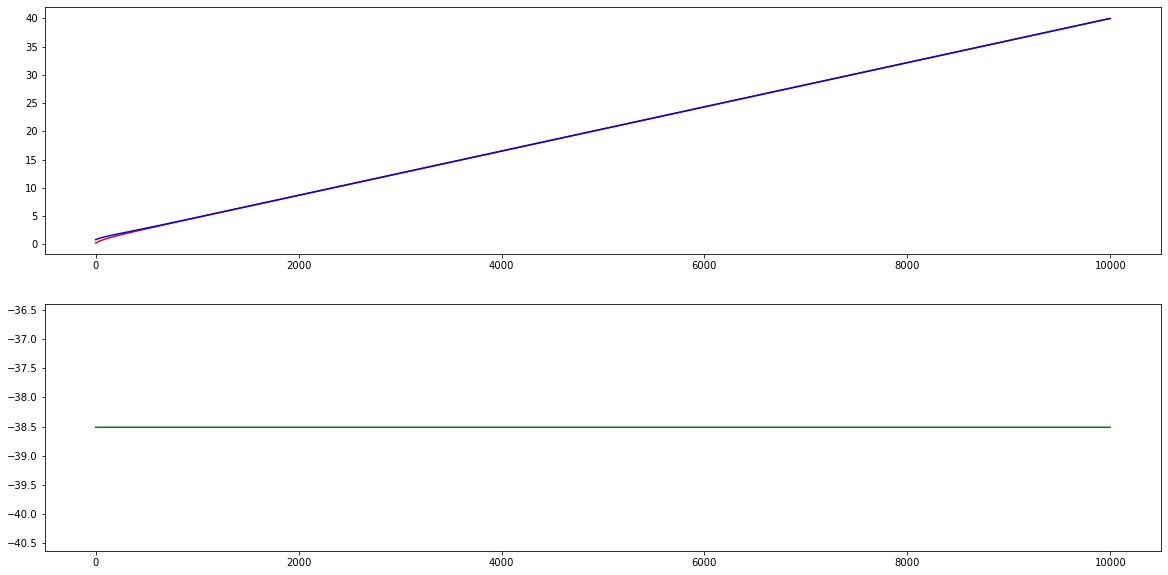

In [131]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
p1 = sns.lineplot(x=[x['epoch'] for x in results], y=[x['weight_1'].data[0] for x in results], c='red',ax=ax[0])
p2 = sns.lineplot(x=[x['epoch'] for x in results], y=[x['weight_2'].data[0] for x in results], c='blue', ax=ax[0])
p3 = sns.lineplot(x=[x['epoch'] for x in results], y=[x['bias'][0][0] for x in results], c='green', ax=ax[1])


In [93]:
results[0]['bias'][0][0]

(-38.51073551158072+0j)

In [35]:
print(weights.data)

  (0, 0)	(39.99879389040163+0j)
  (1, 0)	(39.998793890403+0j)


Make predictions:

In [67]:
inputs = Qobj(np.array([1,1]))

In [68]:
inputs.trans()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 1.]]

In [69]:
result = inputs.trans() * weights + bias

In [70]:
activation(result)

array([[1.+0.j]])

In [71]:
inputs = Qobj(np.array([0,0]))

In [72]:
result = inputs.trans() * weights + bias

In [73]:
activation(result)

array([[1.88364941e-17+0.j]])

In [74]:
inputs = Qobj(np.array([0,1]))

In [75]:
result = inputs.trans() * weights + bias

In [76]:
activation(result)

array([[0.81578667+0.j]])

In [77]:
inputs = Qobj(np.array([1,0]))

In [78]:
result = inputs.trans() * weights + bias

In [79]:
activation(result)

array([[0.81578667+0.j]])